In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import libraries
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
np.random.seed(7)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

Shape of training data: 
(25000,)
(25000,)
Shape of test data: 
(25000,)
(25000,)


In [6]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [7]:
# create the model
epochs = 10

embedding_vecor_length = 16
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           80000     
_________________________________________________________________
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 82,129
Trainable params: 82,129
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/10
391/391 [==============================] - 89s 222ms/step - loss: 0.5819 - accuracy: 0.6733 - val_loss: 0.3507 - val_accuracy: 0.8565
Epoch 2/10
391/391 [==============================] - 85s 217ms/step - loss: 0.2959 - accuracy: 0.8832 - val_loss: 0.3219 - val_accuracy: 0.8748
Epoch 3/10
391/391 [==============================] - 86s 221ms/step - loss: 0.2520 - accuracy: 0.9049 - val_loss: 0.2859 - val_accuracy: 0.8808
Epoch 4/10
391/391 [==============================] - 87s 223ms/step - loss: 0.2263 - accuracy: 0.9155 - val_loss: 0.2997 - val_accuracy: 0.8828
Epoch 5/10
391/391 [==============================] - 87s 223ms/step - loss: 0.2101 - accuracy: 0.9233 - val_loss: 0.3244 - val_accuracy: 0.8742
Epoch 6/10
391/391 [==============================] - 84s 216ms/step - loss: 0.2057 - accuracy: 0.9239 - val_loss: 0.3207 - val_accuracy: 0.8778
Epoch 7/10
391/391 [==============================] - 85s 217ms/step - loss: 0.1951 - accuracy: 0.9268 - val_loss: 0.3366 - val_ac

In [9]:
#evaluate the model
test =  model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (test[1]*100))

Testing Accuracy: 88.03%


In [10]:
def plot_result(history, epoch):
    
    epoch_range = range(1, epoch+1)
    
    plt.plot(epoch_range, history.history['accuracy'], label='Training acc')
    plt.plot(epoch_range, history.history['val_accuracy'], label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.legend(loc='upper left')
    plt.savefig('acc.jpg')

    plt.show()
    
    plt.plot(epoch_range, history.history['loss'], label='Training loss')
    plt.plot(epoch_range, history.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='upper left')
    plt.savefig('loss.jpg')

    plt.show()

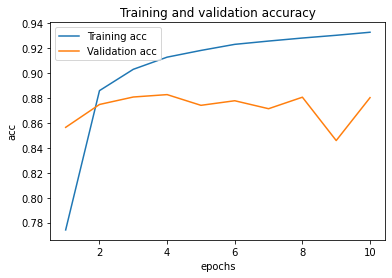

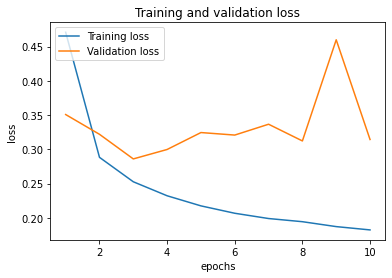

In [11]:
plot_result(history, epochs)